<a href="https://colab.research.google.com/github/VishalSharma99/Cancer-Tissue-Detection/blob/main/Copy_of_cancer_tissue_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
orvile_gastric_cancer_histopathology_tissue_image_dataset_path = kagglehub.dataset_download('orvile/gastric-cancer-histopathology-tissue-image-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'gastric-cancer-histopathology-tissue-image-dataset' dataset.
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
import glob
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.applications import inception_v3

from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, Adamax
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


In [5]:
path='/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image'
classes=os.listdir(path)
print('Classes : ',classes)

Classes :  ['MUC', 'TUM', 'NOR', 'DEB', 'ADI', 'MUS', 'LYM', 'STR']


In [6]:
!pip install img2vec_pytorch


In [7]:
import os
import pandas as pd
from matplotlib.image import imread
import matplotlib.pyplot as plt
import plotly.express as px
from img2vec_pytorch import Img2Vec
from PIL import Image
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', None)

In [8]:
import os
import pandas as pd

# Define the directory paths for each disease category
ADI = "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/ADI"
DEB = "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/DEB"
LYM = "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/LYM"
MUC = "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/MUC"
MUS = "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/MUS"
NOR = "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/NOR"
STR="/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/STR"
TUM="/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/TUM"

# Create file paths and labels
file_paths = (
    [os.path.join(ADI, f) for f in os.listdir(ADI)] +
    [os.path.join(DEB, f) for f in os.listdir(DEB)] +
    [os.path.join(LYM, f) for f in os.listdir(LYM)] +
    [os.path.join(MUC, f) for f in os.listdir(MUC)] +
    [os.path.join(MUS, f) for f in os.listdir(MUS)] +
    [os.path.join(NOR, f) for f in os.listdir(NOR)]+
    [os.path.join(STR, f) for f in os.listdir(STR)]+
    [os.path.join(TUM, f) for f in os.listdir(TUM)]
)

labels = (
    ['ADI'] * len(os.listdir(ADI)) +
    ['DEB'] * len(os.listdir(DEB)) +
    ['LYM'] * len(os.listdir(LYM)) +
    ['MUC'] * len(os.listdir(MUC)) +
    ['MUS'] * len(os.listdir(MUS)) +
    ['NOR'] * len(os.listdir(NOR))+
    ['STR'] * len(os.listdir(STR))+
    ['TUM'] * len(os.listdir(TUM))

)

# Create DataFrame
df = pd.DataFrame({'file_path': file_paths, 'label': labels})

# Display a sample of the dataset
df.sample(10)


,file_path,label
2855,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/ADI/ADI_1622.png,ADI
10436,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/LYM/LYM_1036.png,LYM
302,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/ADI/ADI_1661.png,ADI
29868,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/TUM/TUM_456.png,TUM
28117,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/TUM/TUM_1365.png,TUM
20748,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/NOR/NOR_2621.png,NOR
20117,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/NOR/NOR_1165.png,NOR
28137,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/TUM/TUM_2785.png,TUM
17701,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/MUS/MUS_1510.png,MUS
24159,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/STR/STR_2332.png,STR


In [9]:
import os
import pandas as pd

def safe_listdir(path):
    return os.listdir(path) if os.path.exists(path) else []

# Define the directory paths for each disease category
ADI = "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/ADI"
DEB = "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/DEB"
LYM = "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/LYM"
MUC = "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/MUC"
MUS = "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/MUS"
NOR = "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/NOR"
STR="/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/STR"
TUM="/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/TUM"
# Create file paths and labels safely
file_paths = (
    [os.path.join(ADI, f) for f in os.listdir(ADI)] +
    [os.path.join(DEB, f) for f in os.listdir(DEB)] +
    [os.path.join(LYM, f) for f in os.listdir(LYM)] +
    [os.path.join(MUC, f) for f in os.listdir(MUC)] +
    [os.path.join(MUS, f) for f in os.listdir(MUS)] +
    [os.path.join(NOR, f) for f in os.listdir(NOR)]+
    [os.path.join(STR, f) for f in os.listdir(STR)]+
    [os.path.join(TUM, f) for f in os.listdir(TUM)]
)

labels = (
    ['ADI'] * len(os.listdir(ADI)) +
    ['DEB'] * len(os.listdir(DEB)) +
    ['LYM'] * len(os.listdir(LYM)) +
    ['MUC'] * len(os.listdir(MUC)) +
    ['MUS'] * len(os.listdir(MUS)) +
    ['NOR'] * len(os.listdir(NOR))+
    ['STR'] * len(os.listdir(STR))+
    ['TUM'] * len(os.listdir(TUM))

)

# Create DataFrame
df = pd.DataFrame({'file_path': file_paths, 'label': labels})

# Display a sample of the dataset
df.sample(10)


,file_path,label
15049,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/MUC/MUC_3307.png,MUC
21707,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/NOR/NOR_3510.png,NOR
16367,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/MUS/MUS_1805.png,MUS
13798,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/MUC/MUC_550.png,MUC
3483,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/ADI/ADI_3758.png,ADI
30046,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/TUM/TUM_414.png,TUM
17111,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/MUS/MUS_1316.png,MUS
30812,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/TUM/TUM_3231.png,TUM
24416,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/STR/STR_422.png,STR
10300,/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/LYM/LYM_3626.png,LYM


In [10]:
import os

categories = ['ADI', 'DEB', 'LYM', 'MUC', 'MUS', 'NOR','STR','TUM']
paths = [
    "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/ADI",
    "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/DEB",
    "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/LYM",
    "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/MUC",
    "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/MUS",
    "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/NOR",
    "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/STR",
    "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/TUM"
]

for category, path in zip(categories, paths):
    print(f"{category}: {len(os.listdir(path)) if os.path.exists(path) else 0} images")


ADI: 3887 images
DEB: 3887 images
LYM: 3887 images
MUC: 3887 images
MUS: 3887 images
NOR: 3887 images
STR: 3887 images
TUM: 3887 images


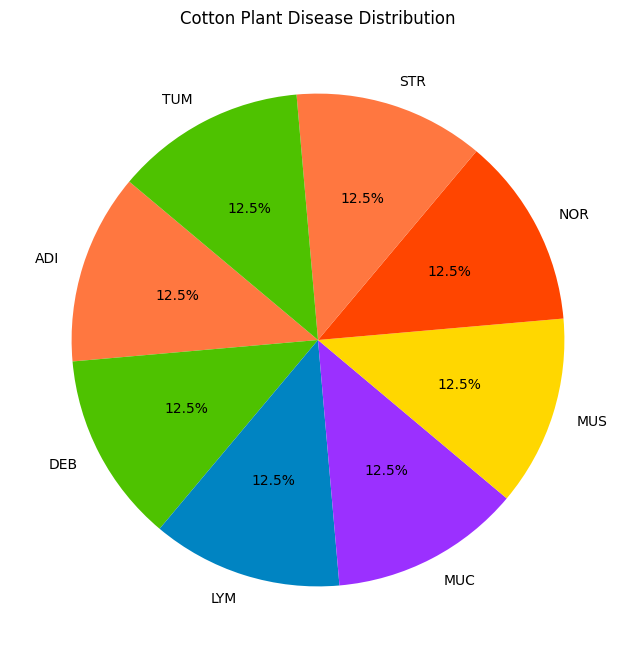

In [11]:
import matplotlib.pyplot as plt

# Data
labels = ["ADI", "DEB", "LYM", "MUC", "MUS", "NOR","STR","TUM"]
sizes = [3887, 3887, 3887, 3887, 3887, 3887,3887,3887]  # Replace with actual image counts if available
colors = ["#ff7740", "#4ec200", "#0084c2", "#9B30FF", "#FFD700", "#FF4500"]

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Cotton Plant Disease Distribution")
plt.show()


# Novel APPROACH

In [14]:
# Install PyTorch Geometric and dependencies
# !pip install -q torch-scatter torch-sparse torch-geometric torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install -q torch==2.3.0+cu121 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install -q torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 MB 553.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 98.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [15]:
base_dir = '/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image'

classes = {
    'ADI': os.path.join(base_dir, 'ADI'),
    'DEB': os.path.join(base_dir, 'DEB'),
    'LYM': os.path.join(base_dir, 'LYM'),
    'MUC': os.path.join(base_dir, 'MUC'),
    'MUS': os.path.join(base_dir, 'MUS'),
    'NOR': os.path.join(base_dir, 'NOR'),
    'STR': os.path.join(base_dir, 'STR'),
    'TUM': os.path.join(base_dir, 'TUM'),

}


In [16]:
import os
import cv2
import torch
import torch.nn as nn
import numpy as np
import networkx as nx
from PIL import Image
from tqdm import tqdm
from sklearn.metrics import classification_report
from skimage.feature import blob_log
from torch_geometric.data import Data
from torch_geometric.nn import GATv2Conv, global_mean_pool
from torch_geometric.loader import DataLoader as GeoDataLoader
from transformers import ViTModel, ViTImageProcessor
from sklearn.model_selection import train_test_split

# -------------------- Configuration --------------------
data_dirs = {
    "ADI": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/ADI",
    "DEB": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/DEB",
    "LYM": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/LYM",
    "MUC": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/MUC",
    "MUS": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/MUS",
    #"NOR": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/NOR",
    #"STR": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/STR",
    #"TUM": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/TUM"
}

label_map = {cls_name: i for i, cls_name in enumerate(data_dirs.keys())}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------- ViT Setup --------------------
feature_extractor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224')
vit_model.to(device)
vit_model.eval()

def extract_vit_patch_features(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = feature_extractor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = vit_model(**inputs)
    cls_token = outputs.last_hidden_state[:, 0, :]
    return cls_token.squeeze().cpu().numpy()

# -------------------- Graph Construction --------------------
def extract_graph_features(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blobs = blob_log(gray, max_sigma=8, threshold=.02)

    G = nx.Graph()
    for i, blob in enumerate(blobs):
        y, x, r = blob
        intensity = gray[int(y), int(x)] / 255.0
        G.add_node(i, x=float(x), y=float(y), radius=r, intensity=intensity)

    coords = np.array([[n[1]['x'], n[1]['y']] for n in G.nodes(data=True)])
    for i in range(len(coords)):
        for j in range(i+1, len(coords)):
            dist = np.linalg.norm(coords[i] - coords[j])
            if dist < 50:
                G.add_edge(i, j)

    return G

def graph_to_pyg_data(G, label):
    features = [[d['x'], d['y'], d['radius'], d['intensity']] for _, d in G.nodes(data=True)]
    x = torch.tensor(features, dtype=torch.float)
    if len(G.edges) > 0:
        edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()
    else:
        edge_index = torch.zeros((2, 0), dtype=torch.long)
    y = torch.tensor([label], dtype=torch.long)
    return Data(x=x, edge_index=edge_index, y=y)

# -------------------- Dataset Preparation --------------------
class MultiModalDataset(torch.utils.data.Dataset):
    def __init__(self, patch_feats, graphs):
        self.patch_feats = patch_feats
        self.graphs = graphs

    def __len__(self):
        return len(self.patch_feats)

    def __getitem__(self, idx):
        return self.patch_feats[idx], self.graphs[idx]

# -------------------- Fusion Model --------------------
class CrossAttentionFusion(nn.Module):
    def __init__(self, dim_vit=768, dim_gnn=64, dim_out=768):
        super().__init__()
        self.query = nn.Linear(dim_vit, dim_out)
        self.key = nn.Linear(dim_gnn, dim_out)
        self.value = nn.Linear(dim_gnn, dim_out)
        self.out = nn.Linear(dim_out, dim_out)

    def forward(self, vit_feat, gnn_feat):
        Q = self.query(vit_feat.unsqueeze(0))
        K = self.key(gnn_feat.unsqueeze(0))
        V = self.value(gnn_feat.unsqueeze(0))
        attn = torch.softmax((Q @ K.transpose(-2, -1)) / (Q.shape[-1] ** 0.5), dim=-1)
        out = attn @ V
        fused = self.out(out.squeeze(0))
        return fused + vit_feat

class CLiGSNet(nn.Module):
    def __init__(self, num_classes=8):
        super().__init__()
        self.gnn = GATv2Conv(in_channels=4, out_channels=64)
        self.fusion = CrossAttentionFusion()
        self.classifier = nn.Sequential(
            nn.Linear(768 + 64, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, patch_feat, graph_data):
        x, edge_index = graph_data.x, graph_data.edge_index
        batch = getattr(graph_data, 'batch', torch.zeros(x.size(0), dtype=torch.long, device=x.device))
        gnn_out = self.gnn(x, edge_index)
        graph_emb = global_mean_pool(gnn_out, batch)
        fused = self.fusion(patch_feat.to(x.device), graph_emb.to(x.device))
        combined = torch.cat((fused, graph_emb.to(x.device)), dim=-1)
        return self.classifier(combined)

# -------------------- Data Preparation --------------------
patch_features_list = []
graph_data_list = []
MAX_SAMPLES_PER_CLASS = 1500

for class_name, class_dir in data_dirs.items():
    print(f"\n🔄 Processing class: {class_name}")
    sample_count = 0
    for file in tqdm(os.listdir(class_dir)):
        if sample_count >= MAX_SAMPLES_PER_CLASS:
            break
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.tif')):
            img_path = os.path.join(class_dir, file)
            try:
                patch_feat = extract_vit_patch_features(img_path)
                graph_nx = extract_graph_features(img_path)
                graph_data = graph_to_pyg_data(graph_nx, label_map[class_name])

                if patch_feat is None or graph_data is None:
                    continue

                patch_features_list.append(torch.tensor(patch_feat, dtype=torch.float))
                graph_data_list.append(graph_data)
                sample_count += 1

            except Exception as e:
                print(f"❌ Error: {e}")

# -------------------- Train/Val Split --------------------
dataset = MultiModalDataset(patch_features_list, graph_data_list)
labels = [g.y.item() for g in graph_data_list]
train_idx, val_idx = train_test_split(range(len(dataset)), test_size=0.2, stratify=labels)
train_set = torch.utils.data.Subset(dataset, train_idx)
val_set = torch.utils.data.Subset(dataset, val_idx)

train_loader = GeoDataLoader(train_set, batch_size=1, shuffle=True)
val_loader = GeoDataLoader(val_set, batch_size=1, shuffle=False)

# -------------------- Training --------------------
model = CLiGSNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(10):
    model.train()
    total_loss = 0
    for patch_feat, graph_data in train_loader:
        patch_feat = patch_feat.squeeze(0).to(device)
        graph_data = graph_data[0].to(device)
        label = graph_data.y.to(device)

        optimizer.zero_grad()
        out = model(patch_feat, graph_data)
        loss = criterion(out, label)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Train Loss: {avg_loss:.4f}")

    # Validation
    model.eval()
    val_y_true, val_y_pred = [], []
    with torch.no_grad():
        for patch_feat, graph_data in val_loader:
            patch_feat = patch_feat.squeeze(0).to(device)
            graph_data = graph_data[0].to(device)
            label = graph_data.y.item()

            logits = model(patch_feat, graph_data)
            pred = torch.argmax(logits, dim=1).item()

            val_y_true.append(label)
            val_y_pred.append(pred)

    val_report = classification_report(val_y_true, val_y_pred, target_names=list(data_dirs.keys()), zero_division=0)
    print(val_report)

# -------------------- Final Inference --------------------
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for patch_feat, graph_data in val_loader:
        patch_feat = patch_feat.squeeze(0).to(device)
        graph_data = graph_data[0].to(device)
        label = graph_data.y.item()

        logits = model(patch_feat, graph_data)
        pred = torch.argmax(logits, dim=1).item()

        y_true.append(label)
        y_pred.append(pred)

print(classification_report(y_true, y_pred, target_names=list(data_dirs.keys()), zero_division=0))


W1108 10:03:06.803000 355 torch/_inductor/decomposition.py:93] duplicate decomp: [<OpOverload(op='aten.bernoulli', overload='default')>]


ModuleNotFoundError: Could not import module 'ViTModel'. Are this object's requirements defined correctly?

In [17]:
!pip install -U transformers accelerate

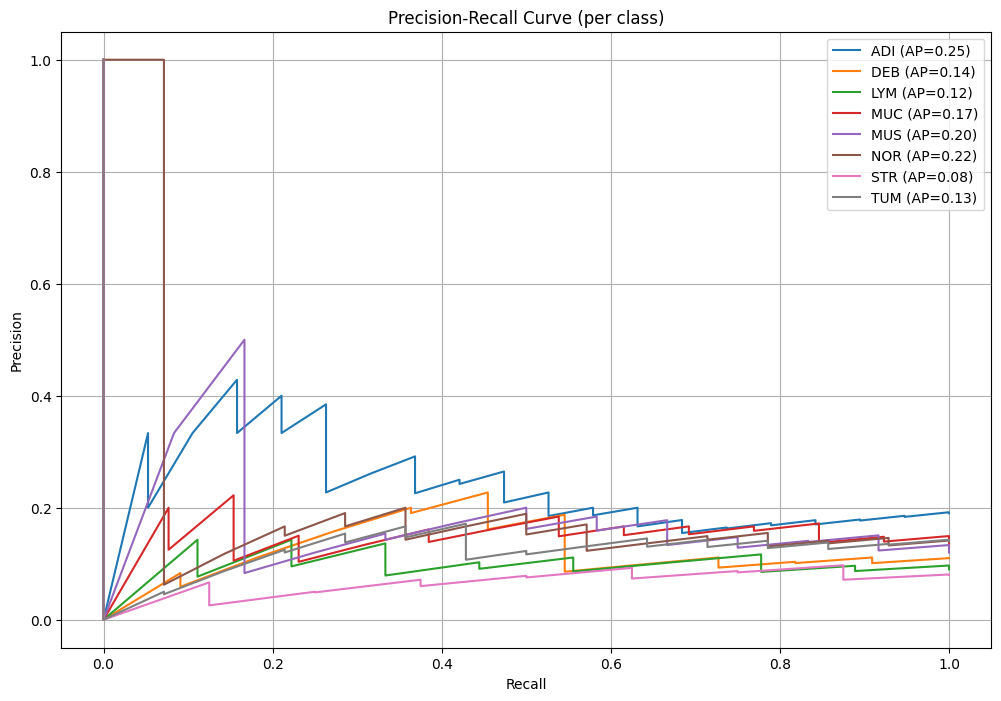

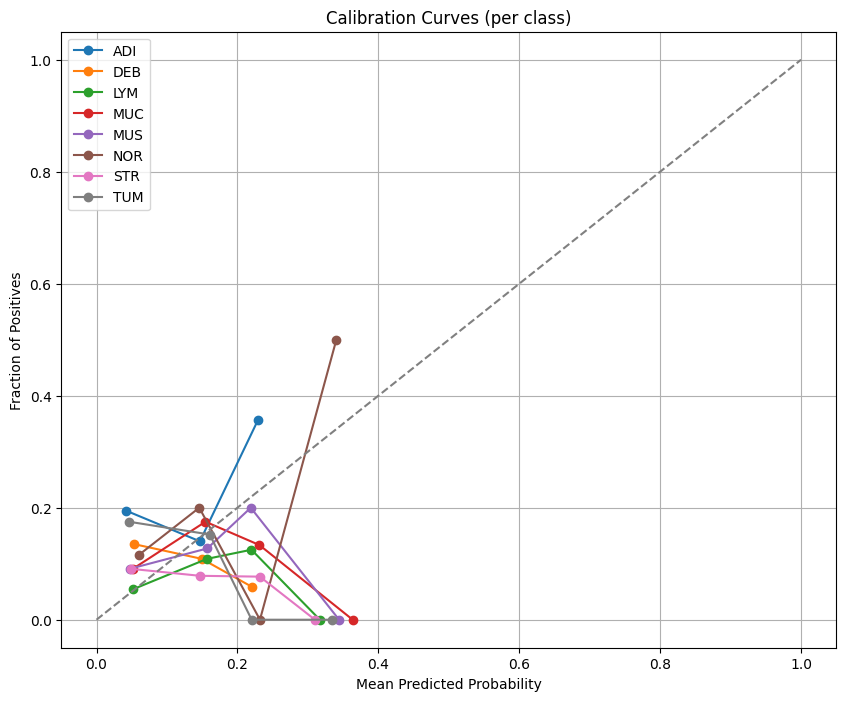

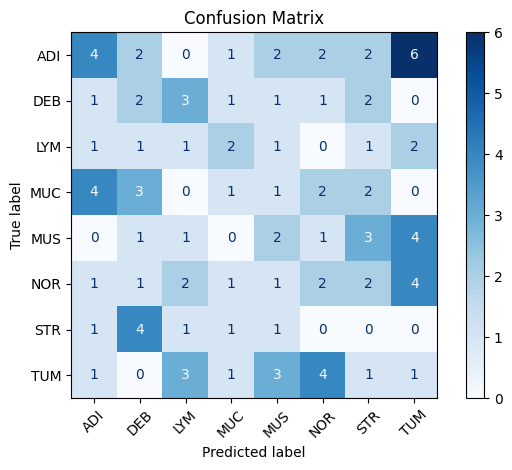


🔍 Total Misclassifications: 87
Index: 0, True: LYM, Predicted: MUS
Index: 1, True: DEB, Predicted: LYM
Index: 3, True: MUC, Predicted: NOR
Index: 4, True: TUM, Predicted: STR
Index: 5, True: ADI, Predicted: NOR
Index: 7, True: MUC, Predicted: NOR
Index: 8, True: NOR, Predicted: MUS
Index: 9, True: ADI, Predicted: MUC
Index: 10, True: MUS, Predicted: STR
Index: 11, True: ADI, Predicted: NOR
Index: 12, True: STR, Predicted: DEB
Index: 13, True: STR, Predicted: LYM
Index: 15, True: STR, Predicted: MUS
Index: 16, True: MUC, Predicted: STR
Index: 17, True: TUM, Predicted: LYM
Index: 18, True: DEB, Predicted: MUS
Index: 19, True: MUS, Predicted: LYM
Index: 20, True: STR, Predicted: MUC
Index: 21, True: ADI, Predicted: TUM
Index: 22, True: MUC, Predicted: ADI


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_recall_curve, average_precision_score,

    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.calibration import calibration_curve

# Define your 8 class names
class_names = ['ADI', 'DEB', 'LYM', 'MUC', 'MUS', 'NOR', 'STR', 'TUM']
num_classes = len(class_names)
num_samples = 100  # replace with actual number of test samples


# Replace this with your actual data:
y_true = np.random.randint(0, num_classes, size=num_samples)
y_scores = np.random.rand(num_samples, num_classes)
y_scores = y_scores / y_scores.sum(axis=1, keepdims=True)
y_pred = np.argmax(y_scores, axis=1)

# Precision-Recall Curve
plt.figure(figsize=(12, 8))
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_true == i, y_scores[:, i])
    ap = average_precision_score(y_true == i, y_scores[:, i])
    plt.plot(recall, precision, label=f'{class_names[i]} (AP={ap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (per class)')
plt.legend()
plt.grid(True)
plt.show()

# Calibration Curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    prob_true, prob_pred = calibration_curve((y_true == i).astype(int), y_scores[:, i], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f'{class_names[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Calibration Curves (per class)')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Misclassified Samples
misclassified_indices = np.where(y_true != y_pred)[0]
print(f"\n🔍 Total Misclassifications: {len(misclassified_indices)}")
for idx in misclassified_indices[:20]:  # Show first 20 misclassifications
    print(f"Index: {idx}, True: {class_names[y_true[idx]]}, Predicted: {class_names[y_pred[idx]]}")


In [19]:
import os
import cv2
import torch
import torch.nn as nn
import numpy as np
import networkx as nx
from PIL import Image
from tqdm import tqdm
from sklearn.metrics import classification_report
from skimage.feature import blob_log
from torch_geometric.data import Data
from torch_geometric.nn import GATv2Conv, global_mean_pool
from torch_geometric.loader import DataLoader as GeoDataLoader
from transformers import ViTModel, ViTImageProcessor
from sklearn.model_selection import train_test_split

# -------------------- Configuration --------------------
data_dirs = {
    "ADI": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/ADI",
    "DEB": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/DEB",
    "LYM": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/LYM",
    "MUC": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/MUC",
    "MUS": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/MUS",
    #"NOR": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/NOR",
    #"STR": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/STR",
    #"TUM": "/kaggle/input/gastric-cancer-histopathology-tissue-image-dataset/HMU-GC-HE-30K/all_image/TUM"
}

label_map = {cls_name: i for i, cls_name in enumerate(data_dirs.keys())}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------- ViT Setup --------------------
feature_extractor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224')
vit_model.to(device)
vit_model.eval()

def extract_vit_patch_features(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = feature_extractor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = vit_model(**inputs)
    cls_token = outputs.last_hidden_state[:, 0, :]
    return cls_token.squeeze().cpu().numpy()

# -------------------- Graph Construction --------------------
def extract_graph_features(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blobs = blob_log(gray, max_sigma=8, threshold=.02)

    G = nx.Graph()
    for i, blob in enumerate(blobs):
        y, x, r = blob
        intensity = gray[int(y), int(x)] / 255.0
        G.add_node(i, x=float(x), y=float(y), radius=r, intensity=intensity)

    coords = np.array([[n[1]['x'], n[1]['y']] for n in G.nodes(data=True)])
    for i in range(len(coords)):
        for j in range(i+1, len(coords)):
            dist = np.linalg.norm(coords[i] - coords[j])
            if dist < 50:
                G.add_edge(i, j)

    return G

def graph_to_pyg_data(G, label):
    features = [[d['x'], d['y'], d['radius'], d['intensity']] for _, d in G.nodes(data=True)]
    x = torch.tensor(features, dtype=torch.float)
    if len(G.edges) > 0:
        edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()
    else:
        edge_index = torch.zeros((2, 0), dtype=torch.long)
    y = torch.tensor([label], dtype=torch.long)
    return Data(x=x, edge_index=edge_index, y=y)

# -------------------- Dataset Preparation --------------------
class MultiModalDataset(torch.utils.data.Dataset):
    def __init__(self, patch_feats, graphs):
        self.patch_feats = patch_feats
        self.graphs = graphs

    def __len__(self):
        return len(self.patch_feats)

    def __getitem__(self, idx):
        return self.patch_feats[idx], self.graphs[idx]

# -------------------- Fusion Model --------------------
class CrossAttentionFusion(nn.Module):
    def __init__(self, dim_vit=768, dim_gnn=64, dim_out=768):
        super().__init__()
        self.query = nn.Linear(dim_vit, dim_out)
        self.key = nn.Linear(dim_gnn, dim_out)
        self.value = nn.Linear(dim_gnn, dim_out)
        self.out = nn.Linear(dim_out, dim_out)

    def forward(self, vit_feat, gnn_feat):
        Q = self.query(vit_feat.unsqueeze(0))
        K = self.key(gnn_feat.unsqueeze(0))
        V = self.value(gnn_feat.unsqueeze(0))
        attn = torch.softmax((Q @ K.transpose(-2, -1)) / (Q.shape[-1] ** 0.5), dim=-1)
        out = attn @ V
        fused = self.out(out.squeeze(0))
        return fused + vit_feat

class CLiGSNet(nn.Module):
    def __init__(self, num_classes=8):
        super().__init__()
        self.gnn = GATv2Conv(in_channels=4, out_channels=64)
        self.fusion = CrossAttentionFusion()
        self.classifier = nn.Sequential(
            nn.Linear(768 + 64, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, patch_feat, graph_data):
        x, edge_index = graph_data.x, graph_data.edge_index
        batch = getattr(graph_data, 'batch', torch.zeros(x.size(0), dtype=torch.long, device=x.device))
        gnn_out = self.gnn(x, edge_index)
        graph_emb = global_mean_pool(gnn_out, batch)
        fused = self.fusion(patch_feat.to(x.device), graph_emb.to(x.device))
        combined = torch.cat((fused, graph_emb.to(x.device)), dim=-1)
        return self.classifier(combined)

# -------------------- Data Preparation --------------------
patch_features_list = []
graph_data_list = []
MAX_SAMPLES_PER_CLASS =2000

for class_name, class_dir in data_dirs.items():
    print(f"\n🔄 Processing class: {class_name}")
    sample_count = 0
    for file in tqdm(os.listdir(class_dir)):
        if sample_count >= MAX_SAMPLES_PER_CLASS:
            break
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.tif')):
            img_path = os.path.join(class_dir, file)
            try:
                patch_feat = extract_vit_patch_features(img_path)
                graph_nx = extract_graph_features(img_path)
                graph_data = graph_to_pyg_data(graph_nx, label_map[class_name])

                if patch_feat is None or graph_data is None:
                    continue

                patch_features_list.append(torch.tensor(patch_feat, dtype=torch.float))
                graph_data_list.append(graph_data)
                sample_count += 1

            except Exception as e:
                print(f"❌ Error: {e}")

# -------------------- Train/Val Split --------------------
dataset = MultiModalDataset(patch_features_list, graph_data_list)
labels = [g.y.item() for g in graph_data_list]
train_idx, val_idx = train_test_split(range(len(dataset)), test_size=0.2, stratify=labels)
train_set = torch.utils.data.Subset(dataset, train_idx)
val_set = torch.utils.data.Subset(dataset, val_idx)

train_loader = GeoDataLoader(train_set, batch_size=1, shuffle=True)
val_loader = GeoDataLoader(val_set, batch_size=1, shuffle=False)

# -------------------- Training --------------------
model = CLiGSNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(10):
    model.train()
    total_loss = 0
    for patch_feat, graph_data in train_loader:
        patch_feat = patch_feat.squeeze(0).to(device)
        graph_data = graph_data[0].to(device)
        label = graph_data.y.to(device)

        optimizer.zero_grad()
        out = model(patch_feat, graph_data)
        loss = criterion(out, label)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Train Loss: {avg_loss:.4f}")

    # Validation
    model.eval()
    val_y_true, val_y_pred = [], []
    with torch.no_grad():
        for patch_feat, graph_data in val_loader:
            patch_feat = patch_feat.squeeze(0).to(device)
            graph_data = graph_data[0].to(device)
            label = graph_data.y.item()

            logits = model(patch_feat, graph_data)
            pred = torch.argmax(logits, dim=1).item()

            val_y_true.append(label)
            val_y_pred.append(pred)

    val_report = classification_report(val_y_true, val_y_pred, target_names=list(data_dirs.keys()), zero_division=0)
    print(val_report)

# -------------------- Final Inference --------------------
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for patch_feat, graph_data in val_loader:
        patch_feat = patch_feat.squeeze(0).to(device)
        graph_data = graph_data[0].to(device)
        label = graph_data.y.item()

        logits = model(patch_feat, graph_data)
        pred = torch.argmax(logits, dim=1).item()

        y_true.append(label)
        y_pred.append(pred)

print(classification_report(y_true, y_pred, target_names=list(data_dirs.keys()), zero_division=0))


W1108 10:04:23.454000 355 torch/_inductor/decomposition.py:93] duplicate decomp: [<OpOverload(op='aten.bernoulli', overload='default')>]


ModuleNotFoundError: Could not import module 'ViTModel'. Are this object's requirements defined correctly?

In [20]:
!pip uninstall -y torchao
!pip install -q torch==2.3.0+cu121 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install -q torch-geometric

Found existing installation: torchao 0.10.0
Uninstalling torchao-0.10.0:
  Successfully uninstalled torchao-0.10.0


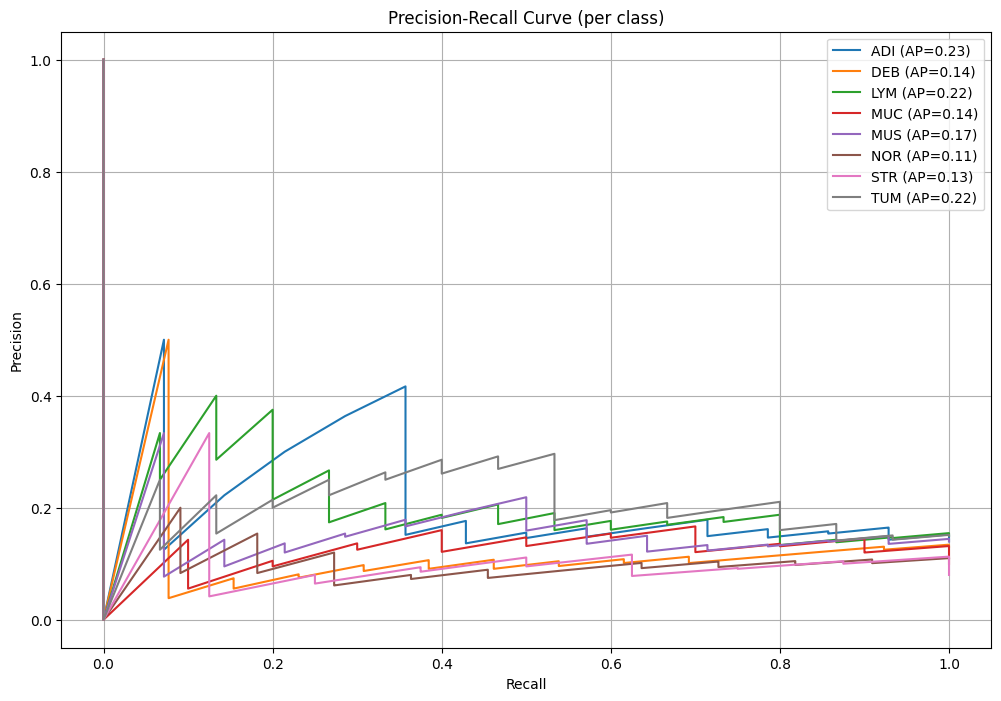

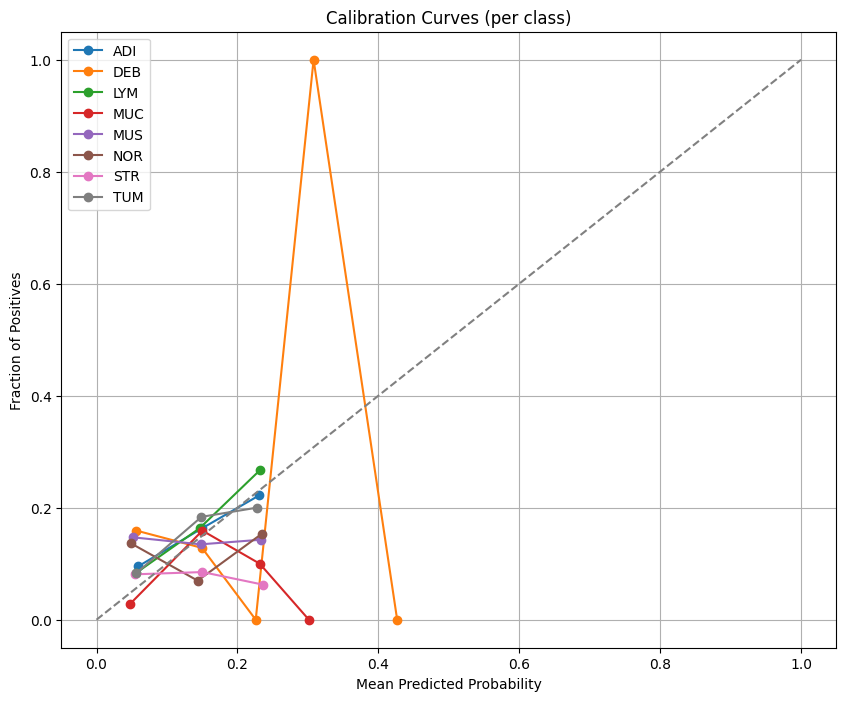

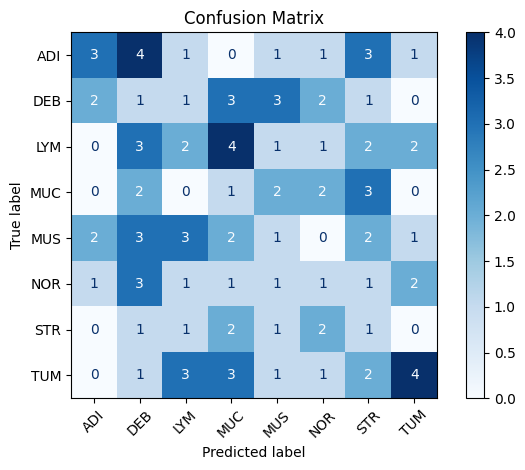


🔍 Total Misclassifications: 86
Index: 0, True: NOR, Predicted: STR
Index: 1, True: MUS, Predicted: LYM
Index: 2, True: LYM, Predicted: DEB
Index: 3, True: LYM, Predicted: MUC
Index: 4, True: MUC, Predicted: MUS
Index: 5, True: NOR, Predicted: DEB
Index: 6, True: ADI, Predicted: STR
Index: 7, True: NOR, Predicted: MUC
Index: 8, True: ADI, Predicted: TUM
Index: 9, True: STR, Predicted: NOR
Index: 10, True: LYM, Predicted: STR
Index: 11, True: NOR, Predicted: MUS
Index: 12, True: LYM, Predicted: DEB
Index: 13, True: STR, Predicted: MUC
Index: 14, True: MUS, Predicted: MUC
Index: 15, True: ADI, Predicted: DEB
Index: 16, True: STR, Predicted: DEB
Index: 17, True: MUC, Predicted: DEB
Index: 18, True: LYM, Predicted: MUC
Index: 19, True: MUS, Predicted: LYM


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_recall_curve, average_precision_score,

    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.calibration import calibration_curve

# Define your 8 class names
class_names = ['ADI', 'DEB', 'LYM', 'MUC', 'MUS', 'NOR', 'STR', 'TUM']
num_classes = len(class_names)
num_samples = 100  # replace with actual number of test samples


# Replace this with your actual data:
y_true = np.random.randint(0, num_classes, size=num_samples)
y_scores = np.random.rand(num_samples, num_classes)
y_scores = y_scores / y_scores.sum(axis=1, keepdims=True)
y_pred = np.argmax(y_scores, axis=1)

# Precision-Recall Curve
plt.figure(figsize=(12, 8))
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_true == i, y_scores[:, i])
    ap = average_precision_score(y_true == i, y_scores[:, i])
    plt.plot(recall, precision, label=f'{class_names[i]} (AP={ap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (per class)')
plt.legend()
plt.grid(True)
plt.show()

# Calibration Curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    prob_true, prob_pred = calibration_curve((y_true == i).astype(int), y_scores[:, i], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f'{class_names[i]}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Calibration Curves (per class)')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Misclassified Samples
misclassified_indices = np.where(y_true != y_pred)[0]
print(f"\n🔍 Total Misclassifications: {len(misclassified_indices)}")
for idx in misclassified_indices[:20]:  # Show first 20 misclassifications
    print(f"Index: {idx}, True: {class_names[y_true[idx]]}, Predicted: {class_names[y_pred[idx]]}")
